In [9]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

In [3]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [5]:
origin = load_data('two_store')
origin

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58
...,...,...
95,53,69
96,52,51
97,52,65
98,49,59


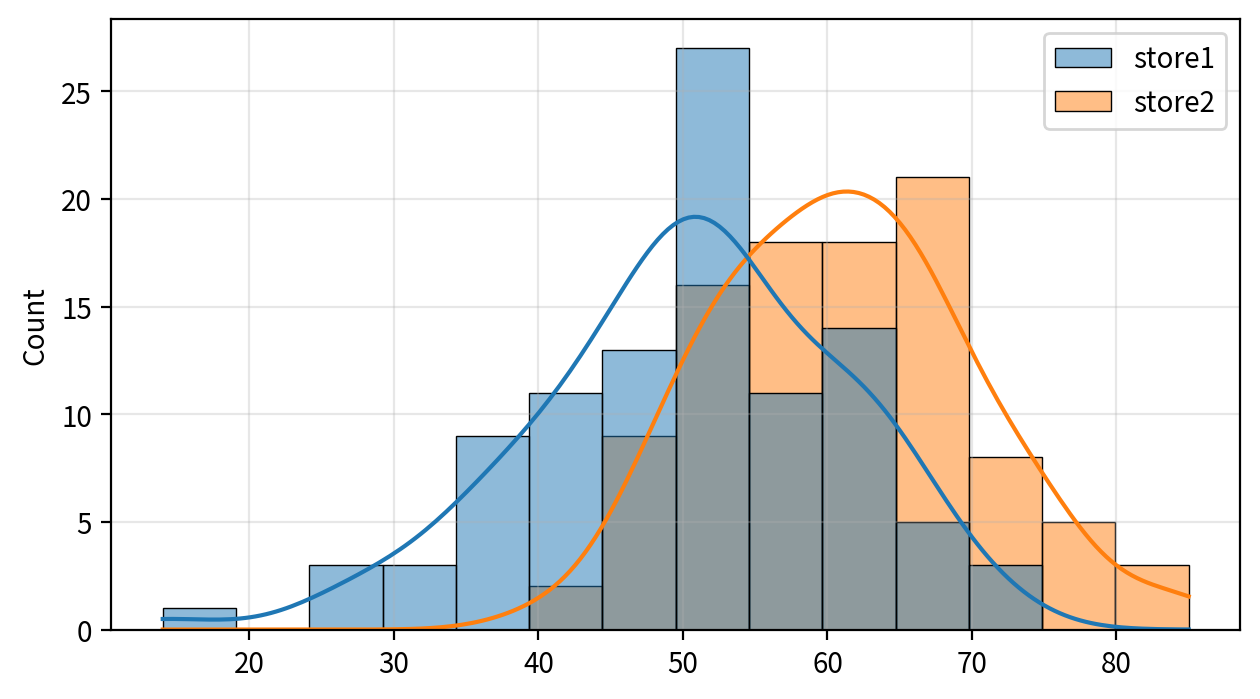

In [6]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.histplot(data=origin, kde=True,edgecolor="#000000", linewidth=0.5)


ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

In [12]:
s, p = shapiro(origin['store1'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,p,p>0.05) 

'statistic: 0.979, p-value: 0.109, 정규성 충족 여부: True'

In [13]:
s, p = shapiro(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,p,p>0.05) 

'statistic: 0.991, p-value: 0.731, 정규성 충족 여부: True'

In [15]:
s = skew(origin['store1'])
print("왜도: %0.3f" %s)
print("왜도의 절대값: %0.3f" %abs(s))

왜도: -0.506
왜도의 절대값: 0.506


In [18]:
k = kurtosis(origin['store1'])
print("첨도: %0.3f" % k)
print("첨도의 절대값: %0.3f" % abs(k))

첨도: 0.422
첨도의 절대값: 0.422


In [20]:
s = skew(origin['store2'])
k = kurtosis(origin['store2'])
print("왜도의 절대값: %0.3f, 첨도의 절대값: %0.3f" % (abs(s), abs(k)))

왜도의 절대값: 0.251, 첨도의 절대값: 0.178


In [22]:
s, p = normaltest(origin['store1'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,p,p>0.05)          

'statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True'

In [24]:
s, p =normaltest(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,p,p>0.05)  

'statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True'

In [27]:
fmt = "[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}"

for c in origin.columns:
    s, p = normaltest(origin[c])
    print(fmt.format(c,s,p,p>=0.05))

[store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


In [ ]:
등분산성 다시듣기